[array([1., 0.])]
[array([1., 0.])]


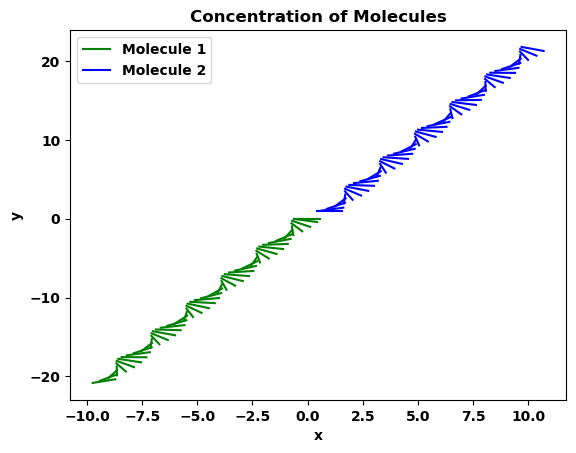

In [12]:
import numpy as np 
import matplotlib.pyplot as plt 


def LJ_Pot(x,y):
    r=(x**2+y**2)**0.5
    return 24*((2*(1/r)**14)) - ((1/r)**8)



cm_1 = [np.array([0,0])]
cm_2 = [np.array([1,1])]
Vcm_1 = [np.array([0,0])]
Vcm_2 = [np.array([0,0])]


L = 2**(-5/6)
MI = 2*L**2

n1 = [np.array([1,0])/np.linalg.norm(np.array([1,0]))]
n2 = [np.array([1,0])/np.linalg.norm(np.array([1,0]))]
print(n1)
print(n2)

# <h4>Rate of change of unit vectors </h4>

r_n1 = [np.array([0,0])]
r_n2 = [np.array([0,0])]
v_n1 = [np.array([0,0])]
v_n2 = [np.array([0,0])]

# <h4> Time array with step size 0.1  </h4>


h=0.1
t_arr = np.arange(0, 5 , h)

# <h4>Position coordinate of the atoms of 1st molecule and 2nd molecule</h4>


x_1 = cm_1[0][0] - (L*n1[0][0])
y_1 = cm_1[0][1] - (L*n1[0][1])
x_2 = cm_1[0][0] + (L*n1[0][0])
y_2 = cm_1[0][1] + (L*n1[0][1])

# Position coordinate of the atoms of 2nd molecule
x_3 = cm_2[0][0] - (L*n2[0][0])
y_3 = cm_2[0][1] - (L*n2[0][1])
x_4 = cm_2[0][0] + (L*n2[0][0])
y_4 = cm_2[0][1] + (L*n2[0][1])

# <h4>Force acting on the atoms and Center of mass</h4>


f_1 = -(LJ_Pot(x_3-x_1,y_3-y_1) + LJ_Pot(x_4-x_1,y_4-y_1))*np.array([x_3-x_1 + x_4-x_1,y_3-y_1 + y_4-y_1])
f_2 = -(LJ_Pot(x_3-x_2,y_3-y_2) + LJ_Pot(x_4-x_2,y_4-y_2))*np.array([x_3-x_2 + x_4-x_2,y_3-y_2 + y_4-y_2])
f_3 = -(LJ_Pot(x_1-x_3,y_1-y_3) + LJ_Pot(x_2-x_3,y_2-y_3))*np.array([x_1-x_3 + x_2-x_3,y_1-y_3 + y_2-y_3])
f_4 = -(LJ_Pot(x_1-x_4,y_1-y_4) + LJ_Pot(x_2-x_4,y_2-y_4))*np.array([x_1-x_4 + x_2-x_4,y_1-y_4 + y_2-y_4])

# print(f_1)
Fcm_1 = (f_1+f_2)/2
Fcm_2 = (f_3+f_4)/2

# <h4> Plot for orientation of molecule</h4>


plt.plot([x_1,x_2],[y_1,y_2],'g')
plt.plot([x_3,x_4],[y_3,y_4],'b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Initial orientation')


# <h4> Change in Center of mass and velocity </h4>


cm_1.append(cm_1[0] + (h*Vcm_1[0]) + (0.5*h**2*Fcm_1))
cm_2.append(cm_2[0] + (h*Vcm_2[0]) + (0.5*h**2*Fcm_2))
Vcm_1.append(Vcm_1[0]+h*Fcm_1)
Vcm_2.append(Vcm_2[0]+h*Fcm_2)

# <h4>  Rotation Terms</h4>

T1 = np.cross(L*n1[-1],f_2-f_1)
t1=np.cross([0,0,T1],n1[-1])
T2 = np.cross(-L*n2[-1],f_4-f_3)
t2 = np.cross([0,0,T2],n2[-1])
v_n1.append(v_n1[-1] + ((0.5*h*t1[:-1])/MI))
v_n2.append(v_n2[-1] + ((0.5*h*t2[:-1])/MI))
n1.append((n1[-1]+ h*v_n1[-1])/np.linalg.norm(n1[-1] + h*v_n1[-1]))
n2.append((n2[-1]+ h*v_n2[-1])/np.linalg.norm(n2[-1] + h*v_n2[-1]))

# <h4> Final loop for ploting change in COM and velocity</h4>

for t in range(1,len(t_arr)-1):
    x_1 = cm_1[t][0] - (L*n1[t][0])
    y_1 = cm_1[t][1] - (L*n1[t][1])
    x_2 = cm_1[t][0] + (L*n1[t][0])
    y_2 = cm_1[t][1] + (L*n1[t][1])
    
    x_3 = cm_2[t][0] - (L*n2[t][0])
    y_3 = cm_2[t][1] - (L*n2[t][1])
    x_4 = cm_2[t][0] + (L*n2[t][0])
    y_4 = cm_2[t][1] + (L*n2[t][1])
    
    plt.plot([x_1,x_2],[y_1,y_2],'g')
    plt.plot([x_3,x_4],[y_3,y_4],'b')
    plt.legend(['Molecule 1','Molecule 2'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Concentration of Molecules')
    
    f_1 = -(LJ_Pot(x_3-x_1,y_3-y_1) + LJ_Pot(x_4-x_1,y_4-y_1))*np.array([x_3-x_1 + x_4-x_1,y_3-y_1 + y_4-y_1])
    f_2 = -(LJ_Pot(x_3-x_2,y_3-y_2) + LJ_Pot(x_4-x_2,y_4-y_2))*np.array([x_3-x_2 + x_4-x_2,y_3-y_2 + y_4-y_2])
    f_3 = -(LJ_Pot(x_1-x_3,y_1-y_3) + LJ_Pot(x_2-x_3,y_2-y_3))*np.array([x_1-x_3 + x_2-x_3,y_1-y_3 + y_2-y_3])
    f_4 = -(LJ_Pot(x_1-x_4,y_1-y_4) + LJ_Pot(x_2-x_4,y_2-y_4))*np.array([x_1-x_4 + x_2-x_4,y_1-y_4 + y_2-y_4]) 
    
    Fcm_1 = (f_1+f_2)/2
    Fcm_2 = (f_3+f_4)/2
    
    cm_1.append(cm_1[t] + (h*Vcm_1[t]) + (0.5*h**2*Fcm_1))
    cm_2.append(cm_2[t] + (h*Vcm_2[t]) + (0.5*h**2*Fcm_2))
    Vcm_1.append(Vcm_1[t]+(h*Fcm_1))
    Vcm_2.append(Vcm_2[t]+(h*Fcm_2))
    
    T1 = np.cross(L*n1[-1],f_2-f_1)
    t1=np.cross([0,0,T1],n1[-1])
    l1 = 2*np.dot(v_n1[-1],n1[-1])
    T2 = np.cross(-L*n2[-1],f_4-f_3)
    t2 = np.cross([0,0,T2],n2[-1])
    l2 = 2*np.dot(v_n2[-1],n2[-1])
    
    v_n1.append(v_n1[-1] + ((h*t1[:-1])/MI) - l1*n1[-1])
    v_n2.append(v_n2[-1] + ((h*t2[:-1])/MI) - l2*n2[-1])
    n1.append((n1[-1]+ h*v_n1[-1])/np.linalg.norm(n1[-1] + h*v_n1[-1]))
    n2.append((n2[-1]+ h*v_n2[-1])/np.linalg.norm(n2[-1] + h*v_n2[-1])) 

# <h4> Final Position Coordinate of the atoms </h4>


x_1 = cm_1[-1][0] - (L*n1[-1][0])
y_1 = cm_1[-1][1] - (L*n1[-1][1])
x_2 = cm_1[-1][0] + (L*n1[-1][0])
y_2 = cm_1[-1][1] + (L*n1[-1][1])  
x_3 = cm_2[-1][0] - (L*n2[-1][0])                 
y_3 = cm_2[-1][1] - (L*n2[-1][1])                 
x_4 = cm_2[-1][0] + (L*n2[-1][0])                 
y_4 = cm_2[-1][1] + (L*n2[-1][1])



